In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#import dataset, dataset was downloaded from kaggle:https://www.kaggle.com/datasets/bartek358/train-delays
df=pd.read_csv("delays.csv")
df.head(2)

,datetime,id,carrier,date,connection,arrival,delay,name
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31,162 min,Warszawa Zachodnia
1,2022-05-16 00:00:00,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15,0 min,Warszawa Zachodnia


In [3]:
#Check delay column values
df['delay'].value_counts()

0 min       2834968
1 min        290496
2 min        128428
3 min         72148
4 min         53485
             ...   
1425 min          3
424 min           2
257 min           2
290 min           1
285 min           1
Name: delay, Length: 358, dtype: int64

In [4]:
#Change delay column to binary values
df['delay'] = np.where(df['delay']=="0 min",0,1)
df.head(2)

,datetime,id,carrier,date,connection,arrival,delay,name
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31,1,Warszawa Zachodnia
1,2022-05-16 00:00:00,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15,0,Warszawa Zachodnia


In [5]:
#Filter for columns for classification
df_clas = df[["carrier","delay"]]

In [6]:
#create a dummy values for carrier column
dummies = pd.get_dummies(df_clas["carrier"])
dummies

,Arriva,Koleje Dolnośląskie,Koleje Mazowieckie,Koleje Wielkopolskie,Koleje Śląskie,PKP Intercity,PKP SKM w Trójmieście Sp. z o.o.,POLREGIO Sp. z o.o.,SKM Warszawa,Łódzka Kolej Aglomeracyjna
0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3718165,0,0,0,0,0,1,0,0,0,0
3718166,0,0,1,0,0,0,0,0,0,0
3718167,0,0,0,0,0,1,0,0,0,0
3718168,0,0,0,0,0,1,0,0,0,0


In [41]:
#Check columns name
df_cl.columns

Index(['carrier', 'delay', 'Arriva', 'Koleje Dolnośląskie',
       'Koleje Mazowieckie', 'Koleje Wielkopolskie', 'Koleje Śląskie',
       'PKP Intercity', 'PKP SKM w Trójmieście Sp. z o.o.',
       'POLREGIO Sp. z o.o.', 'SKM Warszawa', 'Łódzka Kolej Aglomeracyjna'],
      dtype='object')

In [7]:
#Concat df_clas and dummies values
df_cl = pd.concat([df_clas,dummies],axis=1)
df_cl = df_cl[['delay', 'Arriva', 'Koleje Dolnośląskie', 'Koleje Mazowieckie', 'Koleje Wielkopolskie', 'Koleje Śląskie','PKP Intercity', 'PKP SKM w Trójmieście Sp. z o.o.', 'POLREGIO Sp. z o.o.', 'SKM Warszawa', 'Łódzka Kolej Aglomeracyjna']]

In [8]:
#Split data into X and y with reshape function
X = df_cl.iloc[:,1:]
y = df_cl.iloc[:, 0]

In [9]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
# Create the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [62]:
# evaluate the model using confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Confusion matrix:\n', cm)
print('Classification report:\n', cr)

C:\Users\piotr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:
 [[566720      0]
 [176914      0]]
Classification report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86    566720
           1       0.00      0.00      0.00    176914

    accuracy                           0.76    743634
   macro avg       0.38      0.50      0.43    743634
weighted avg       0.58      0.76      0.66    743634



C:\Users\piotr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piotr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# calculate the ROC curve and AUC score
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

In [68]:
#Define a size
plt.rcParams["figure.figsize"] = (12, 8)

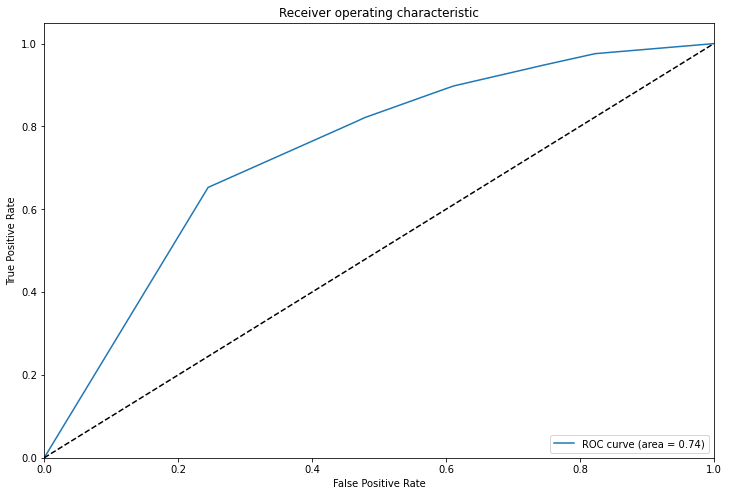

In [69]:
# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [72]:
# create the decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

In [73]:
# evaluate the performance 
dt_cm = confusion_matrix(y_test, dt_y_pred)
dt_cr = classification_report(y_test, dt_y_pred)
print('Decision tree confusion matrix:\n', dt_cm)
print('Decision tree classification report:\n', dt_cr)

C:\Users\piotr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision tree confusion matrix:
 [[566720      0]
 [176914      0]]
Decision tree classification report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86    566720
           1       0.00      0.00      0.00    176914

    accuracy                           0.76    743634
   macro avg       0.38      0.50      0.43    743634
weighted avg       0.58      0.76      0.66    743634



C:\Users\piotr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piotr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
# calculate the ROC curve and AUC score
dt_y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_y_pred_proba)
dt_auc = roc_auc_score(y_test, dt_y_pred_proba)

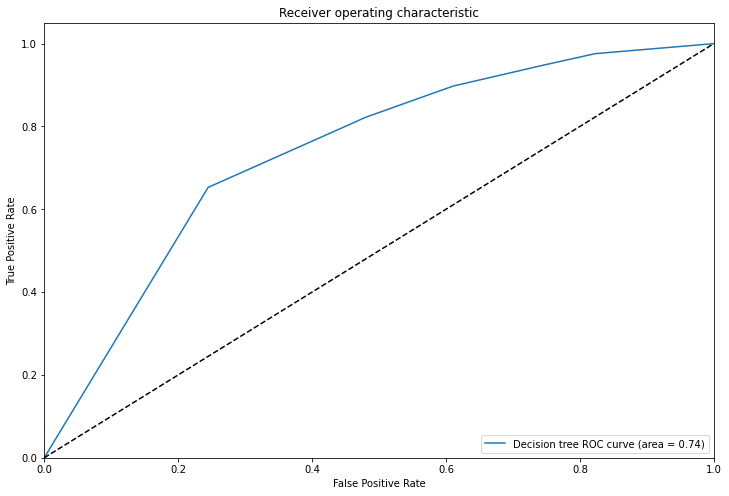

In [75]:
# plot the ROC curves 
plt.plot(dt_fpr, dt_tpr, label='Decision tree ROC curve (area = %0.2f)' % dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [77]:
# create the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [78]:
# evaluate the performance 
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cr = classification_report(y_test, rf_y_pred)
print('Random forest confusion matrix:\n', rf_cm)
print('Random forest classification report:\n', rf_cr)

C:\Users\piotr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random forest confusion matrix:
 [[566720      0]
 [176914      0]]
Random forest classification report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86    566720
           1       0.00      0.00      0.00    176914

    accuracy                           0.76    743634
   macro avg       0.38      0.50      0.43    743634
weighted avg       0.58      0.76      0.66    743634



C:\Users\piotr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piotr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
# calculate the ROC curve and AUC score
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_pred_proba)
rf_auc = roc_auc_score(y_test, rf_y_pred_proba)

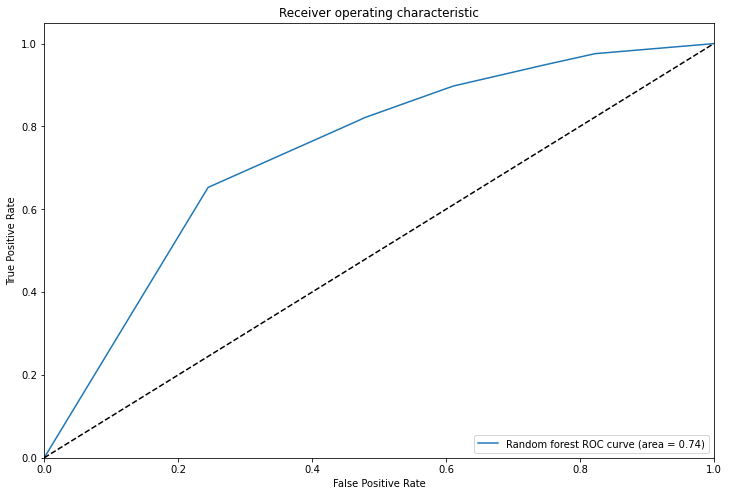

In [80]:
# plot the ROC curves 
plt.plot(rf_fpr, rf_tpr, label='Random forest ROC curve (area = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()